<h3>Name : Nadir Ali Khan</h3>
<h3>Exam: Mid Exam</h3>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


### Q1: Answer

In [2]:
data  = pd.read_csv('/home/nak/Data-Science-Course-IBA/assignments/Stock_Market_Regression_Dataset.csv')
df = pd.DataFrame(data)
df.head()

,Opening_Price,Closing_Price_Previous_Day,Daily_High,Daily_Low,Trading_Volume,Market_Cap,P/E_Ratio,EPS,Beta,Dividend_Yield,50_Day_Moving_Avg,200_Day_Moving_Avg,RSI,MACD,Stock_Price
0,0.620303,0.644982,0.374383,0.208268,0.720320,0.811118,0.138601,0.486829,0.248716,0.168107,0.734325,0.538097,0.216185,0.310000,641.701471
1,0.966654,0.848680,0.879947,0.460012,0.623807,0.376768,0.077712,0.401069,0.593981,0.287144,0.847951,0.151100,0.367129,0.124904,816.405928
2,0.404832,0.039661,0.272549,0.400735,0.478165,0.543696,0.274991,0.523041,0.509005,0.316178,0.830200,0.545641,0.332270,0.947339,288.576853
3,0.845112,0.982588,0.692234,0.378223,0.280861,0.663318,0.980817,0.626715,0.881615,0.329103,0.406954,0.906275,0.756867,0.981410,981.428080
4,0.774764,0.448516,0.531068,0.900515,0.551647,0.255397,0.435620,0.516316,0.096720,0.743763,0.109354,0.404918,0.804622,0.467570,439.465739


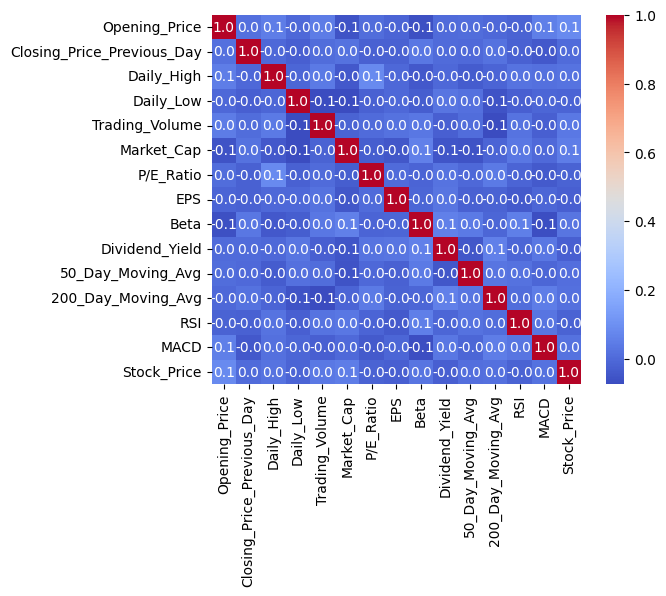

<Figure size 1000x600 with 0 Axes>

Opening_Price                 0.083536
Closing_Price_Previous_Day    0.003492
Daily_High                    0.025895
Daily_Low                    -0.014443
Trading_Volume                0.037355
Market_Cap                    0.051285
P/E_Ratio                    -0.015907
EPS                          -0.027250
Beta                          0.028053
Dividend_Yield               -0.024769
50_Day_Moving_Avg             0.011363
200_Day_Moving_Avg            0.015779
RSI                          -0.017105
MACD                          0.018233
Stock_Price                   1.000000
Name: Stock_Price, dtype: float64

In [3]:
#  Filling Missing Values
df.fillna(df.median(), inplace=True)

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm', square=True, fmt='.1f')
plt.figure(figsize=(10, 6))
plt.show()

# strong positive ans strong negative
correlation_matrix.Stock_Price.sort_values(ascending=False)
correlation_matrix.Stock_Price

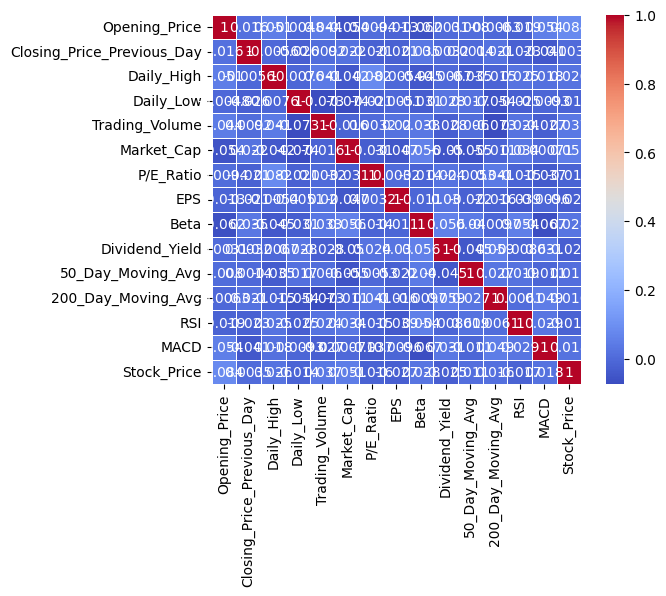

<Figure size 1200x1800 with 0 Axes>

Strong Positive Correlations:
Stock_Price    1.0
Name: Stock_Price, dtype: float64

Strong Negative Correlations:
Series([], Name: Stock_Price, dtype: float64)


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filling missing values
df.fillna(df.median(), inplace=True)

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Visualizing the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.figure(figsize=(12, 18))
plt.show()

# Strong positive and negative correlations with 'Stock_Price'
stock_corr = correlation_matrix["Stock_Price"].sort_values(ascending=False)

# Define thresholds
positive_threshold = 0.5
negative_threshold = -0.5

# Filter strong positive and negative correlations
strong_positive = stock_corr[stock_corr > positive_threshold]
strong_negative = stock_corr[stock_corr < negative_threshold]

# Printing results
print("Strong Positive Correlations:")
print(strong_positive)

print("\nStrong Negative Correlations:")
print(strong_negative)


### Q2: Answer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Opening_Price               700 non-null    float64
 1   Closing_Price_Previous_Day  700 non-null    float64
 2   Daily_High                  700 non-null    float64
 3   Daily_Low                   700 non-null    float64
 4   Trading_Volume              700 non-null    float64
 5   Market_Cap                  700 non-null    float64
 6   P/E_Ratio                   700 non-null    float64
 7   EPS                         700 non-null    float64
 8   Beta                        700 non-null    float64
 9   Dividend_Yield              700 non-null    float64
 10  50_Day_Moving_Avg           700 non-null    float64
 11  200_Day_Moving_Avg          700 non-null    float64
 12  RSI                         700 non-null    float64
 13  MACD                        700 non

In [6]:
df.isnull().sum()


Opening_Price                 0
Closing_Price_Previous_Day    0
Daily_High                    0
Daily_Low                     0
Trading_Volume                0
Market_Cap                    0
P/E_Ratio                     0
EPS                           0
Beta                          0
Dividend_Yield                0
50_Day_Moving_Avg             0
200_Day_Moving_Avg            0
RSI                           0
MACD                          0
Stock_Price                   0
dtype: int64

In [7]:
df.fillna(df.median(), inplace=True)
                 

In [8]:
df.isnull().sum()

Opening_Price                 0
Closing_Price_Previous_Day    0
Daily_High                    0
Daily_Low                     0
Trading_Volume                0
Market_Cap                    0
P/E_Ratio                     0
EPS                           0
Beta                          0
Dividend_Yield                0
50_Day_Moving_Avg             0
200_Day_Moving_Avg            0
RSI                           0
MACD                          0
Stock_Price                   0
dtype: int64

Accuracy 2: 1.0
Accuracy:-0.01759461552612107


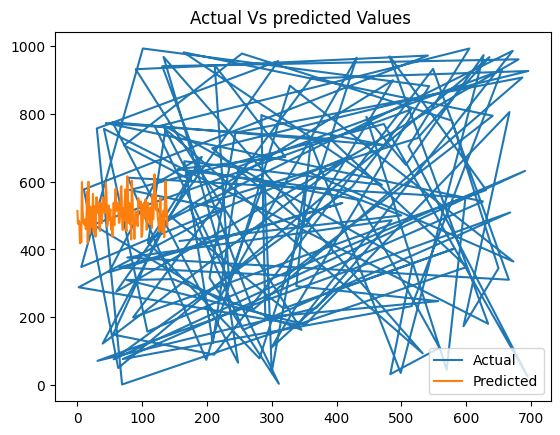

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

X = df.drop(['Stock_Price'], axis=1)
y = df['Stock_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model_2 = DecisionTreeRegressor()

model.fit(X_train, y_train)
model_2.fit(X_test, y_test)

y_pred = model.predict(X_test)
y_pred_2 = model_2.predict(X_test)

accuracy = r2_score(y_test, y_pred)
accuracy_2 = r2_score(y_test, y_pred_2)

print(f"Accuracy 2: {accuracy_2}")
print(f"Accuracy:{accuracy}")

# Plot of actual and predict values 
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.title("Actual Vs predicted Values ")
plt.show()



Accuracy (R2 score): -0.0032356340434067654


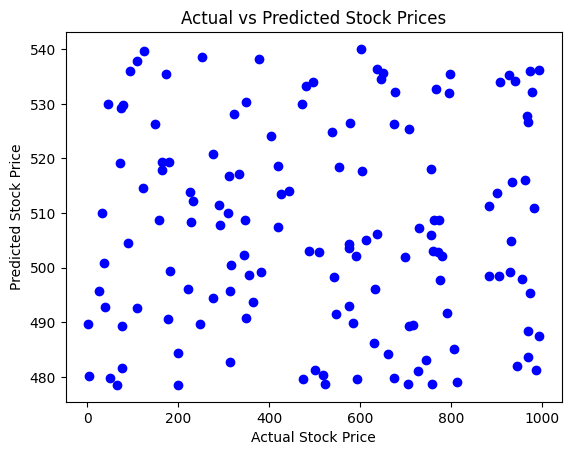

In [11]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data
X = df['Market_Cap'].values.reshape(-1, 1)  # Reshape to 2D array
y = df['Stock_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy (R2 score)
acc = r2_score(y_test, y_pred)

# Print accuracy
print(f"Accuracy (R2 score): {acc}")

# Optionally, plot actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()


### Q3: Answer

In [ ]:
data2 = pd.read_csv('/home/nak/Data-Science-Course-IBA/assignments/Healthcare_Classification_Dataset.csv')
df2 = pd.DataFrame(data2)
df2.head()

,Age,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,BMI,Smoking_Status,Physical_Activity,Alcohol_Consumption,Sleep_Duration,Family_History_Diabetes,Family_History_Heart_Disease,Stress_Level,Medication_Adherence,Disease_Risk
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,1
1,0.181825,0.183405,0.304242,0.524756,0.431945,0.291229,NaN,0.139494,0.292145,0.366362,0.456070,0.785176,0.199674,0.514234,0
2,0.592415,0.046450,0.607545,0.170524,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152,0.122038,0.495177,1
3,0.034389,NaN,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,1
4,0.088493,0.195983,0.045227,0.325330,0.388677,0.271349,0.828738,0.356753,0.280935,0.542696,0.140924,0.802197,0.074551,0.986887,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Opening_Price               700 non-null    float64
 1   Closing_Price_Previous_Day  700 non-null    float64
 2   Daily_High                  700 non-null    float64
 3   Daily_Low                   700 non-null    float64
 4   Trading_Volume              700 non-null    float64
 5   Market_Cap                  700 non-null    float64
 6   P/E_Ratio                   700 non-null    float64
 7   EPS                         700 non-null    float64
 8   Beta                        700 non-null    float64
 9   Dividend_Yield              700 non-null    float64
 10  50_Day_Moving_Avg           700 non-null    float64
 11  200_Day_Moving_Avg          700 non-null    float64
 12  RSI                         700 non-null    float64
 13  MACD                        700 non

In [ ]:
df2.fillna(df2.mean(), inplace=True)
df2.isnull().sum()


Age                             0
Blood_Pressure                  0
Cholesterol                     0
Glucose_Level                   0
Heart_Rate                      0
BMI                             0
Smoking_Status                  0
Physical_Activity               0
Alcohol_Consumption             0
Sleep_Duration                  0
Family_History_Diabetes         0
Family_History_Heart_Disease    0
Stress_Level                    0
Medication_Adherence            0
Disease_Risk                    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, recall_score, accuracy_score, precision_score

X = df2.drop(['Disease_Risk'], axis=1)
y = df2['Disease_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c_r = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)
re_score = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
p_r = precision_score(y_test, y_pred)

cross_valid = cross_val_score(model, X,y, cv=5)


print(f"Classification Report:\n\n{c_r}")

print("*"*30)

print(f"Accuracy Score: {acc_score}")
print(f"Recall Score: {re_score}")
print(f"F1 Score: {f1}")
print(f"Precision Score: {p_r}")

# Cross validation

print("*"*30)
print(f"Cross Validation Mean Accuracy: {cross_valid.mean()}")



Classification Report:

              precision    recall  f1-score   support

           0       0.46      0.26      0.33        65
           1       0.53      0.73      0.62        75

    accuracy                           0.51       140
   macro avg       0.50      0.50      0.48       140
weighted avg       0.50      0.51      0.49       140

******************************
Accuracy Score: 0.5142857142857142
Recall Score: 0.7333333333333333
F1 Score: 0.6179775280898876
Precision Score: 0.5339805825242718
******************************
Cross Validation Mean Accuracy: 0.5142857142857142


Opening_Price                 0
Closing_Price_Previous_Day    0
Daily_High                    0
Daily_Low                     0
Trading_Volume                0
Market_Cap                    0
P/E_Ratio                     0
EPS                           0
Beta                          0
Dividend_Yield                0
50_Day_Moving_Avg             0
200_Day_Moving_Avg            0
RSI                           0
MACD                          0
Stock_Price                   0
dtype: int64
Mean Squared Error: 91164.11719666263
R² Score: -0.01759461552612107


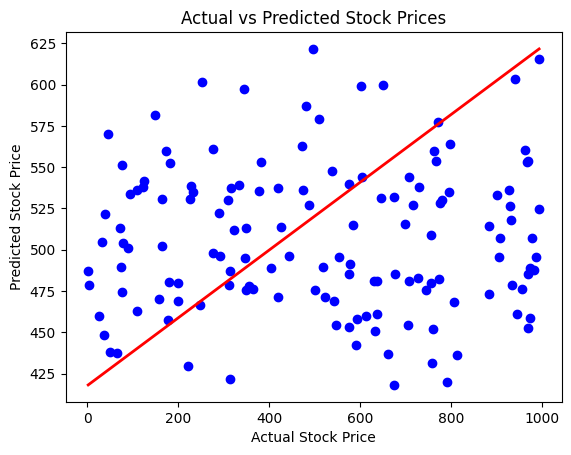

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load data (replace with your actual file if necessary)
# df = pd.read_csv("your_data.csv")  # Example

# Check if there are any missing values
print(df.isnull().sum())

# Handle missing values (simple strategy - fill with mean)
df.fillna(df.mean(), inplace=True)

# Features (input) and target (output)
X = df.drop('Stock_Price', axis=1)
y = df['Stock_Price']

# Scale features (it's a good practice to scale data when using models like linear regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² score

# Print out the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2)  # Line of best fit
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()



Mean Squared Error: 164792.96782638557
R² Score: -0.8394565964473379


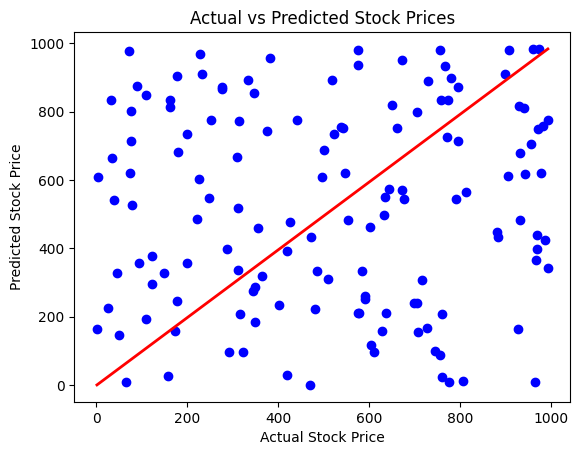

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2)  # Line of best fit
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()
